Total sum mean: 2448.4
Total sum median: 2448
Total sum standard deviation: 50.52


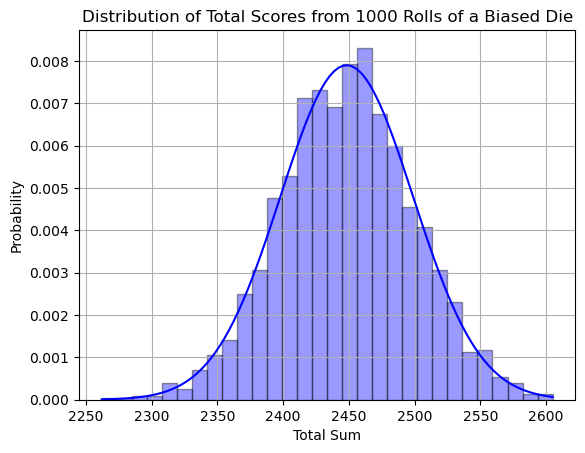

In [6]:
# ============================
# Monte Carlo simulation of an unfair six-sided die
# ============================

"""
Die probabilities as follows: 
P(x=1) = 2*P(x=2) = 3*P(x=3) = 4*P(x=4) = 5*P(x=5) = 6*P(x=6)

Objective:
- Roll the unfair die 1000 times per experiment
- Repeat the experiment 2000 times
- Record the total sum of each experiment
- Compute mean, median, and standard deviation of the sums
- Compare the distribution fit with a normal distribution
"""

import numpy as np
import matplotlib.pyplot as plt

# Possible die outcomes and their probabilities
outputs = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([20 / 49, 10 / 49, 20 / 147, 5 / 49, 4 / 49, 10 / 147])

# List to store total sums from each experiment
final = []

# ============================
# Monte Carlo simulation
# ============================

for _ in range(2000):
    sample = np.random.choice(outputs, size=1000, p=probs) 
    # Generate 1000 die rolls according to the specified probabilities
    i = 1
    total = 0
    # Calculate total sum of outcomes for this sample
    for value in sample:
        a = np.sum(sample == i)
        # Count how many times face i appears
        total += a * i
        # Multiply count by face value and add to total
        i += 1
        if i > 6:
            break
    final += [total]
    # Add the total sum of this experiment to the 'final' list

# Compute and print statistics of the total sums
print("Total sum mean:", round(np.mean(final), 2))
print("Total sum median:", int(np.median(final)))      # Median is an integer
print("Total sum standard deviation:", round(np.std(final), 2))

# ============================
# Histogram of total sums
# ============================

plt.hist(final, bins=30, density=True, color='blue', alpha=0.4, edgecolor='black')
plt.title('Distribution of Total Scores from 1000 Rolls of a Biased Die')
plt.xlabel('Total Sum')
plt.ylabel('Probability')
plt.grid(True)

# ============================
# Compute and plot normal PDF
# ============================

# Define normal distribution PDF
def pdf(x, mean, std):
    return 1/np.sqrt(2 * np.pi * std**2) * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Convert list to array for plotting
final = np.array(final)
x = np.linspace(final.min(), final.max(), 100)
y = pdf(x, final.mean(), final.std())

# Overlay normal distribution
plt.plot(x, y, color='blue')

plt.show()